# 5.0 Implementation of the moving window fast 2D median filter

# 5.1  2D median filter using quickshort sorting 

Execution Time: 15.811805725097656 seconds
Space Complexity: 386726 bytes


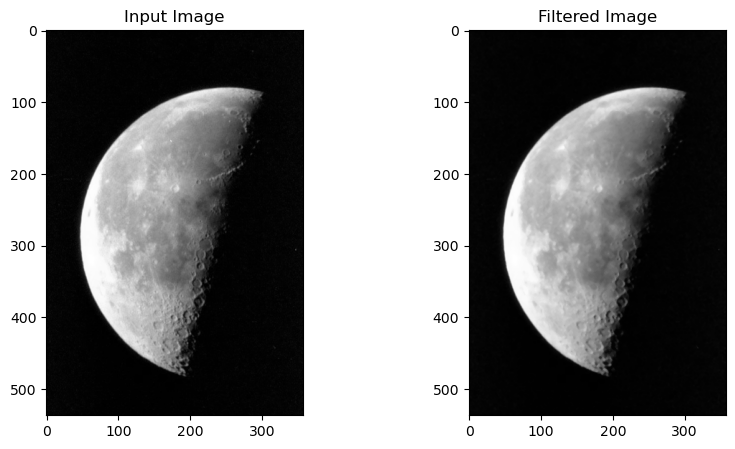

In [3]:
import numpy as np
import sys
import time

def apply_median_filter(image, window_size):
    padded_image = np.pad(image, pad_width=window_size//2, mode='constant', constant_values=0)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+window_size, j:j+window_size].flatten()
            median_value = quickselect(window, len(window)//2)
            result[i, j] = median_value
    
    return result

def partition(arr, pivot):
    left = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return left, equal, right

def quickselect(arr, k):
    pivot = np.random.choice(arr)
    left, equal, right = partition(arr, pivot)
    
    if k < len(left):
        return quickselect(left, k)
    elif k < len(left) + len(equal):
        return equal[0]
    else:
        return quickselect(right, k - len(left) - len(equal))

# Example usage:
from skimage import io, color

# Load an example image (replace with your own)
input_image = io.imread(r'C:\Users\User\Desktop\moon.tif')
# input_image = color.rgb2gray(input_image)  # Convert to grayscale if needed

# Define window size (adjust as needed)
window_size = 3

# # Apply median filter using quickselect
output_image = apply_median_filter(input_image, window_size)


def analyze_code(image, window_size):
    # Start time measurement
    start_time = time.time()

    # Apply median filter using quickselect
    output_image = apply_median_filter(image, window_size)

    # End time measurement
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    # Estimate space complexity
    padded_image_size = sys.getsizeof(np.pad(image, pad_width=window_size//2, mode='constant', constant_values=0))
    result_size = sys.getsizeof(np.zeros_like(image))
    window_size = sys.getsizeof(np.zeros(window_size*window_size))

    # Total space complexity
    space_complexity = padded_image_size + result_size + window_size

    # Print results
    print(f"Execution Time: {execution_time} seconds")
    print(f"Space Complexity: {space_complexity} bytes")

    
# Example usage:
from skimage import io

# Load an example image (replace with your own)
input_image = io.imread(r'C:\Users\User\Desktop\moon.tif')
# input_image = color.rgb2gray(input_image)  # Convert to grayscale if needed

# Define window size (adjust as needed)
window_size = 3

# Analyze the code
analyze_code(input_image, window_size)





# Display the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Input Image')
plt.subplot(1, 2, 2), plt.imshow(output_image, cmap='gray'), plt.title('Filtered Image')
plt.show()


# 5.2  2D Fast Median Filtering 


Execution Time: 42.473408699035645 seconds
Space Complexity: 384876 bytes


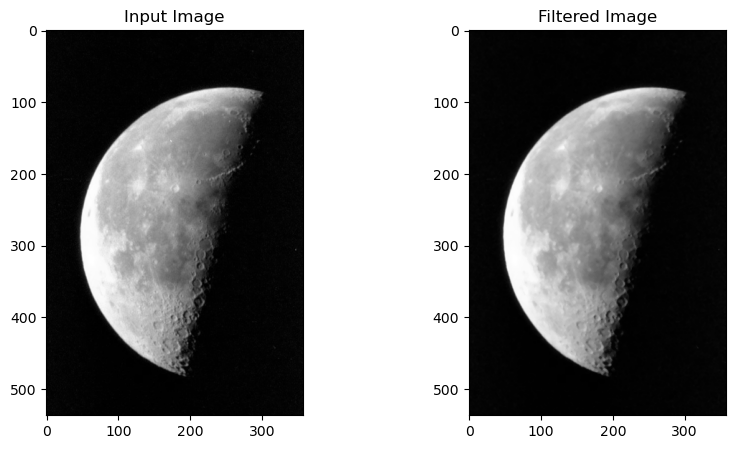

In [4]:
import numpy as np
import sys
import time


def fast_2D_median_filter(input_image, window_size):
    rows, cols = input_image.shape
    output_image = np.zeros_like(input_image)
    
    for i in range(rows):
        for j in range(cols):
            # Define the window
            window = input_image[max(0, i - window_size//2):min(rows, i + window_size//2 + 1),
                                 max(0, j - window_size//2):min(cols, j + window_size//2 + 1)]
            
            histogram = np.histogram(window, bins=range(257))[0]
            median_value = np.median(window)
            ltmdn = np.sum(histogram[:int(median_value) + 1])
            
            while ltmdn <= window.size / 2:
                median_value -= 1
                ltmdn += histogram[int(median_value)]
            
            output_image[i, j] = median_value
    
    return output_image

# Example Usage:
# Load an example image (replace with your own)
from skimage import io, color
input_image = io.imread(r'C:\Users\User\Desktop\moon.tif')
# input_image = color.rgb2gray(input_image)  # Convert to grayscale if needed

# Define window size (adjust as needed)
window_size = 3

# Apply fast 2D median filtering
output_image = fast_2D_median_filter(input_image, window_size)

# Add the code for space, time, and execution complexity estimation here
def analyze_code(input_image, window_size):
    # Start time measurement
    start_time = time.time()

    # Apply fast 2D median filtering
    _ = fast_2D_median_filter(input_image, window_size)

    # End time measurement
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    # Estimate space complexity
    rows, cols = input_image.shape
    input_image_size = sys.getsizeof(input_image)
    output_image_size = sys.getsizeof(np.zeros_like(input_image))
    window_size = sys.getsizeof(input_image[:window_size, :window_size])

    # Total space complexity
    space_complexity = input_image_size + output_image_size + window_size

    # Print results
    print(f"Execution Time: {execution_time} seconds")
    print(f"Space Complexity: {space_complexity} bytes")


analyze_code(input_image, window_size)


# Display the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Input Image')
plt.subplot(1, 2, 2), plt.imshow(output_image, cmap='gray'), plt.title('Filtered Image')
plt.show()


#   2D Fast Median Filtering using parallel programming


Execution Time (Parallel): 82.86508989334106 seconds
Space Complexity (Parallel): 384876 bytes


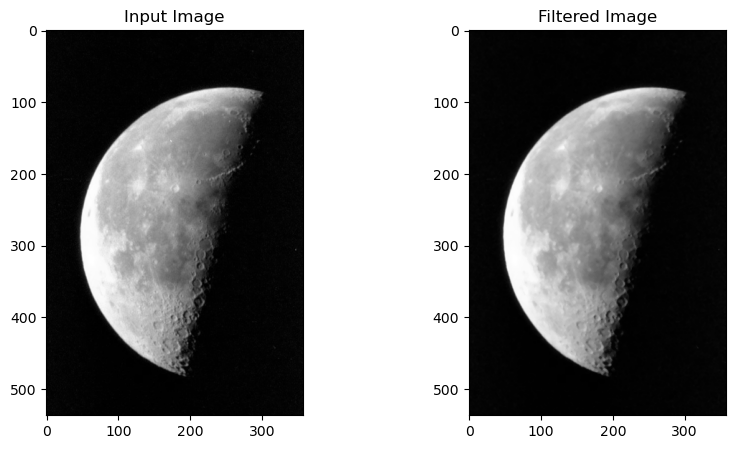

In [5]:
import numpy as np
import sys
import time

from concurrent.futures import ThreadPoolExecutor

def compute_median_value(i, j, input_image, window_size):
    rows, cols = input_image.shape
    window = input_image[max(0, i - window_size//2):min(rows, i + window_size//2 + 1),
                         max(0, j - window_size//2):min(cols, j + window_size//2 + 1)]
    
    histogram = np.histogram(window, bins=range(257))[0]
    median_value = np.median(window)
    ltmdn = np.sum(histogram[:int(median_value) + 1])
    
    while ltmdn <= window.size / 2:
        median_value -= 1
        ltmdn += histogram[int(median_value)]
    
    return median_value

def fast_2D_median_filter_parallel(input_image, window_size):
    rows, cols = input_image.shape
    output_image = np.zeros_like(input_image)
    
    with ThreadPoolExecutor() as executor:
        futures = []
        for i in range(rows):
            for j in range(cols):
                future = executor.submit(compute_median_value, i, j, input_image, window_size)
                futures.append((i, j, future))
        
        for i, j, future in futures:
            output_image[i, j] = future.result()
    
    return output_image

# Example Usage:
# Load an example image (replace with your own)
from skimage import io, color
input_image = io.imread(r'C:\Users\User\Desktop\moon.tif')
# input_image = color.rgb2gray(input_image)  # Convert to grayscale if needed

# Define window size (adjust as needed)
window_size = 3

# Apply fast 2D median filtering with parallel processing
output_image = fast_2D_median_filter_parallel(input_image, window_size)

def analyze_code_parallel(input_image, window_size):
    # Start time measurement
    start_time = time.time()

    # Apply fast 2D median filtering with parallel processing
    _ = fast_2D_median_filter_parallel(input_image, window_size)

    # End time measurement
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    # Estimate space complexity
    rows, cols = input_image.shape
    input_image_size = sys.getsizeof(input_image)
    output_image_size = sys.getsizeof(np.zeros_like(input_image))
    window_size = sys.getsizeof(input_image[:window_size, :window_size])

    # Total space complexity
    space_complexity = input_image_size + output_image_size + window_size

    # Print results
    print(f"Execution Time (Parallel): {execution_time} seconds")
    print(f"Space Complexity (Parallel): {space_complexity} bytes")



analyze_code_parallel(input_image, window_size)




# Display the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Input Image')
plt.subplot(1, 2, 2), plt.imshow(output_image, cmap='gray'), plt.title('Filtered Image')
plt.show()

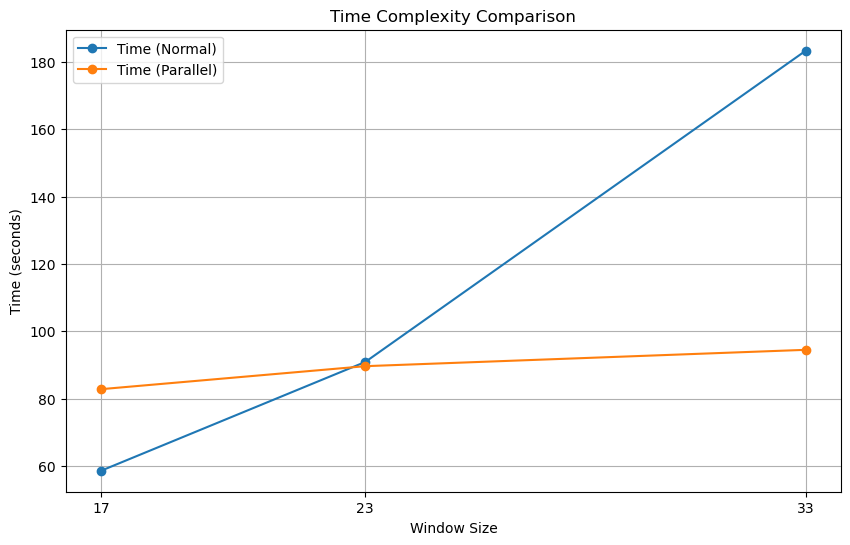

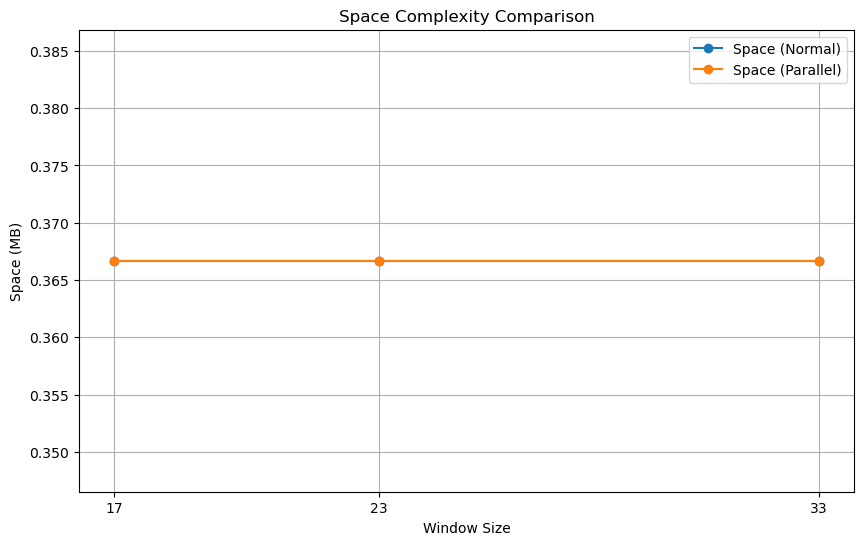

In [6]:


# Different window sizes for the filter
window_sizes = [17, 23, 33]

# Number of threads for parallel processing
num_threads = 4

# Lists to store complexity measures for non-parallel and parallel methods
time_normal, time_parallel, space_normal, space_parallel = [], [], [], []

# Iterate through different window sizes and measure complexity
for window_size in window_sizes:
    start_time = time.time()
    filtered_img_normal = apply_median_filter(input_image, window_size)
    time_normal.append(time.time() - start_time)
    space_normal.append(input_image.nbytes + filtered_img_normal.nbytes)

    start_time = time.time()
    filtered_img_parallel = fast_2D_median_filter_parallel(input_image, window_size)
    time_parallel.append(time.time() - start_time)
    space_parallel.append(input_image.nbytes + filtered_img_parallel.nbytes)

# Plotting complexity results
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, time_normal, label='Time (Normal)', marker='o')
plt.plot(window_sizes, time_parallel, label='Time (Parallel)', marker='o')
plt.xlabel('Window Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Time Complexity Comparison')
plt.xticks(window_sizes)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(window_sizes, [space / (1024 * 1024) for space in space_normal], label='Space (Normal)', marker='o')
plt.plot(window_sizes, [space / (1024 * 1024) for space in space_parallel], label='Space (Parallel)', marker='o')
plt.xlabel('Window Size')
plt.ylabel('Space (MB)')
plt.legend()
plt.title('Space Complexity Comparison')
plt.xticks(window_sizes)
plt.grid(True)
plt.show()
